In [1]:
#importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import nbformat as nb

#reading in datasets
cleandata = pd.read_csv(r'Data/Cleaned Expenditure Data.csv')
ogdata = pd.read_csv(r'Data/integrated_dataset.csv')


In [2]:
#Inquiry Question 1: What is the relationship between QS and employability rankings, 
#and how does expenditure play a role in such?
#rectifying inconsistent values
cleandata.replace({'United Kingdom of Great Britain and Northern Ireland': "United Kingdom", 
'United States of America': 'United States'}, inplace=True)

#grouping the data by country, taking the top 10 countries for average expenditure
cleangroup = cleandata.groupby("Country")['Expenditure (constant US$ millions)'].mean().nlargest(10)

cleangroupdf = pd.DataFrame(cleangroup) #creating the first dataframe to be joined
cleangroupdf

,Expenditure (constant US$ millions)
Country,
United States,256883.353062
Germany,47055.079968
United Kingdom,38016.637028
India,33847.630408
France,32579.208210
Japan,30910.225943
Canada,26645.638165
Brazil,25715.635888
Australia,17708.363988


In [3]:
#determining the top 10 countries for expenditure in the second dataset
ogdata.nlargest(10, 'Expenditure (constant US$ millions)') 

#grouping the data by country and QS score, and then taking the top 10 countries for expenditure
ogdatagroup = ogdata.groupby(['Country', 'score scaled_QS2023', 'Global University Employability Rank 2020'])['Expenditure (constant US$ millions)'].max().nlargest(10)
ogdatagroup = pd.DataFrame(ogdatagroup)

ogdatagroupdf = ogdatagroup.drop(['Expenditure (constant US$ millions)'], axis = 1)
ogdatagroupdf

,,
Country,score scaled_QS2023,Global University Employability Rank 2020
United States,51.871605,1.0
Germany,42.188462,12.0
United Kingdom,52.041304,4.0
India,39.412500,27.0
France,48.046154,22.0
Japan,51.366667,6.0
Canada,46.652941,8.0
Brazil,36.400000,109.0
Australia,49.562500,15.0


In [4]:
#combining dataframes
final_df = pd.merge(ogdatagroupdf.reset_index(), cleangroupdf.reset_index(), on=['Country'], how='outer')
final_df

,Country,score scaled_QS2023,Global University Employability Rank 2020,Expenditure (constant US$ millions)
0,United States,51.871605,1.0,256883.353062
1,Germany,42.188462,12.0,47055.079968
2,United Kingdom,52.041304,4.0,38016.637028
3,India,39.412500,27.0,33847.630408
4,France,48.046154,22.0,32579.208210
5,Japan,51.366667,6.0,30910.225943
6,Canada,46.652941,8.0,26645.638165
7,Brazil,36.400000,109.0,25715.635888
8,Australia,49.562500,15.0,17708.363988
9,Italy,33.438462,57.0,14802.873240


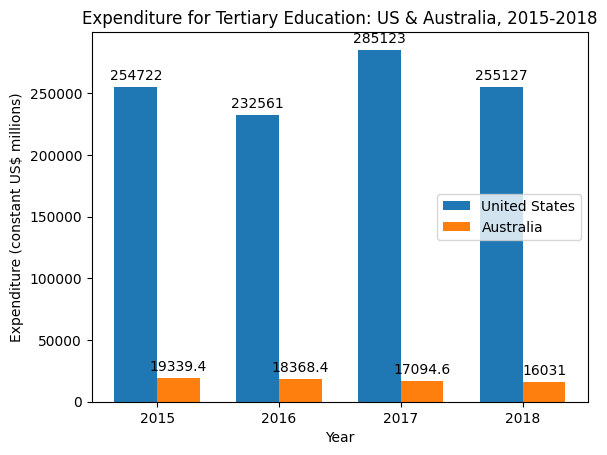

In [2]:
#Inquiry Question 2: How has the government expenditure on tertiary education in the US and Australia changed from 2015-2018?
#preparing and filtering data
cleandataUS = cleandata.query("Country == 'United States of America'")
cleandataAUS = cleandata.query("Country == 'Australia'")
cleandataUS = cleandataUS.reset_index()
cleandataAUS = cleandataAUS.reset_index()

#bar aesthetics
x = np.arange(len(cleandataAUS['Year']))
width = 0.35

#barplot structure and contents
fig, ax = plt.subplots()
plot1 = ax.bar(x - width/2, cleandataUS['Expenditure (constant US$ millions)'], width, label = 'United States')
plot2 = ax.bar(x + width/2, cleandataAUS['Expenditure (constant US$ millions)'], width, label = 'Australia')
ax.bar_label(plot1, padding=3)
ax.bar_label(plot2, padding=3)
ax.set_xticks(x, cleandataAUS['Year'])
#barplot titles and legend
plt.title('Expenditure for Tertiary Education: US & Australia, 2015-2018')
plt.xlabel('Year')
plt.ylabel('Expenditure (constant US$ millions)')
plt.legend(loc='center right')

In [36]:
fig = px.scatter(final_df, x='Global University Employability Rank 2020', y='score scaled_QS2023', 
size='Expenditure (constant US$ millions)', color='Country', labels = {
    'Global University Employability Rank 2020': 'Global University Employability Rank 2020',
    'score scaled_QS2023': 'QS 2023 Scaled Score',
    'Country': 'Country'
    },
    title='Tertiary Education: QS and Employability Rankings for Top 10 Spending Nations',
    color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_xaxes(autorange='reversed')



In [21]:
#Binned Quantitative Group-Aggregate
#only including instances where a nation's expenditure is greater than 10000 constant US$ millions
cleandataex = cleandata.loc[(cleandata['Expenditure (constant US$ millions)'] > 10000)]
#forming quantitative bins based on yearly expenditure, 
qgroups = cleandataex.groupby([cleandataex['Country'], pd.cut(cleandataex['Expenditure (constant US$ millions)'], 
[10000, 20000, 100000, 200000, 300000])])
qgroups.size().unstack()



Expenditure (constant US$ millions),"(10000, 20000]","(20000, 100000]","(100000, 200000]","(200000, 300000]"
Country,,,,
Australia,4,0,0,0
Brazil,0,4,0,0
Canada,0,4,0,0
France,0,2,0,0
Germany,0,4,0,0
India,0,6,0,0
Italy,4,0,0,0
Japan,0,3,0,0
Mexico,4,0,0,0
